In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab2.ipynb")

# **ESS-314-Lab 2**
**Scripting in Python and Seismic Ray Tracing**

* This lab was designed by Ken Creager, Harold Tobin, Marine Denolle and Anna Ledeczi
* Modified by Barrett Johnson (bnjo@uw.edu)
* Modified by Yiyu Ni to work with Gradescope (niyiyu@uw.edu).
---

# 1) **Writing Your Own Script/Program**

A script or program is a series of commands executed in a row. It is much easier to write a script that can be run over and over again than to retype your code line by line. Any notebook can be treated as a script, and the cells can be run consecutively. 

In Python, we import specific modules that contain useful functions. This allows to not store everything in memory, but just pick and choose what we want.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1. Start a script in which you define a 1x10 row vector x with equally spaced values between 1 and 10. 

In [ ]:
x = np.linspace(1,10,10)
print(x)
print(x.shape)

2. Calculate the sine and cosine of vector x.

In [ ]:
y = np.sin(x) # Remember to add comments :)
z = np.cos(x)

3. Plot both functions and add a legend.

In [ ]:
plt.plot(x,y, 'g-', label='sin(x)')
plt.plot(x,z, 'r-', label='cos(x)')
plt.legend()
plt.show()

4. Increase the smoothess of your plots by increasing the number of elements in your ``x`` vector. You can accomplish this by changing one number in your script, and then rerunning it.

In [ ]:
x2 = np.linspace(1,10,50)
y2 = np.sin(x2)
z2 = np.cos(x2)

In [ ]:
# Let's make a quick plot to show the difference in the smoothness! 
fig, ax = plt.subplots(2,1)

ax[0].plot(x,y, 'g-', label='sin(x)')
ax[0].plot(x2,y2, 'r:', label='sin(x2)')
ax[0].set_title('Sine with Differing Smoothness')
ax[0].set_xlabel('x (radians)')
ax[0].set_ylabel('Sine of x')
ax[0].legend()

ax[1].plot(x, z, 'g-', label='cos(x)')
ax[1].plot(x2, z2, 'r:', label='cos(x2)')
ax[1].set_xlabel('x (radians)')
ax[1].set_ylabel('Cosine of x')
ax[1].legend()

plt.tight_layout() 
plt.show()

----

## **For Loops**

You can perform operations on every element of a vector or matrix at the same time, as demonstrated in Lab 1. However, sometimes you want to do something slightly different to each element, or you may just want to perform an operation multiple times. For loops enable this kind of programming. Although there are often (usually) better ways to do this kind of thing than a for loop, it's still important to understand how they work and be prepared to use them.

Think about the command:

```
x1=x*4
```


Now, this command is absolutely how you want to go about multiplying every element of the vector x by the same scalar. But what if you wanted to multiply every element by its index? We will create a **for loop**.

It is better practice in computing to allocate the memory the variables at the beginning of scripts. Many dynamic computing languages like Matlab, Python, Julia are flexible with on-the-fly allocations, but it slows down codes. When filling the values of the variable in  **for loop**, we have to declare the variable before calling it in the for oo.


1. Pre-allocate variables

In [ ]:
x = np.arange(1,51,1)
x1 = np.zeros(50) # must define before loop

2. fill in ``x1`` values

In [ ]:
# first method
for i in range(len(x)):
    x1[i] = x[i]*(i+1) # Here we do i+1 because Python starts at 0
    print(x1[i])

print('==== hi ====')
# second method
for i,ii in enumerate(x): # Here i is the index and ii is the value of the ith index 
    x1[i] = (i+1)*ii
    print(x1[i])


In this script, the variable ``i`` is the index into the vector ``x``. For example, when ``i=0``, then ``x[i]`` is the first element of ``x`` (that's a Python thing it's ``i=1`` for Matlab and Julia). The **for loop** will perform the calculation starting when ``i=0``, then move on to ``i=1``, etc., until it gets to the final element of the vector. In **for loops**, indexing is important. The command ``x1[i]=x[i]*4`` occurs inside the **for loop**, and ``i`` has a different value for every pass through the loop.


4. Create a randomly sized matrix M with all of the elements equal to 1. Randomly determine the number of rows and columns in M using the randint() function:

In [ ]:
# generate random integer values
from numpy.random import seed, randint # you must import these separately 
# seed random number generator
seed(1) # This ensures that each time you generate random numbers, 
# generate some integers
values = randint(0, 10, 20)
print(values)

In [ ]:
# number of rows
seed(42)
nrows = randint(1,10,1)
print(nrows)
ncolumns = randint(1,10,1)
print(ncolumns) 

This will randomly generate a number between 1 and 10 and assign them to the
row and column variables.

5. Create a matric ``M`` using the function ``np.ones()``, with the ``row`` and ``column`` variables as
inputs. The ``row`` variable should define the number of rows in M, while the
``column`` variable should define the number of columns in ``M``.

In [14]:
M = np.ones([nrows[0],ncolumns[0]]) # Must index to take the first value since it is an array
print(M.shape)
print(len(M))

(7, 4)
7


6. Create a set of **for loops** that multiplies each entry in ``M`` by the product of its row and column position. For example, the entry in the 2nd row and 3rd column should be multiplied by (2*3). Remember that Python starts indexing at 0.

In [15]:
for i in range(nrows[0]):
    for j in range(ncolumns[0]):
        M[i,j]=M[i,j]*(j+1)*(i+1)

print(M)

[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]
 [ 5. 10. 15. 20.]
 [ 6. 12. 18. 24.]
 [ 7. 14. 21. 28.]]


<!-- BEGIN QUESTION -->

**Question 1.** What is the difference between the output of the length and shape functions? Describe in words and output the values in a cell. (1 point)

This is my answer

<!-- END QUESTION -->

---

## 2) **Earthquake Travel Times**

Now we are going to practice writing a script to calculate the travel time curve of P and S waves from a shallow earthquake. The earthquake occurs 10 km underground and is recorded on 10 seismometers. The first seismometer is directly above the earthquake. The second seismometer is 5 km east of the first, the third is 5 km east from the second and so on. This setup is illustrated in the figure below. The P-wave velocity for the layer is 6 km/s, and the S-wave velocity is 4 km/s. 

![alt text](./source_stations.png)
**Figure 1:** Source - Stations receiver geometries

**Question 2a:** What is the distance between the earthquake and the third station? You can help yourself by drawing a straight-line ray path on a paper-copy of this figure. Define and put your answer in a float variable called `answer_2a`, e.g., `12.3`. (1 point)

In [16]:
# Type your answer here
answer_2a = np.sqrt(10**2 + 15**2)
answer_2a

18.027756377319946

In [17]:
grader.check("q2a")

q2a results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2b** You will now write a script to calculate and plot a travel-time curve for the seismic waves from this earthquake. Your script should do the following:

1. Define variables as follows: **x** is a vector containing the epicentral distance between the earthquake and each station; **h** is the source depth; **d** is a vector of source-station distances; **vp** and **vs** are the P- and S-wave speeds respectively; **tp** and **ts** for P- and S-wave travel times.

2. Calculate the travel times based on the distances and velocities.

3. Plot the travel time curves. The x axis will be the epicentral distance in km, which is defined to be the horizontal distance between the epicenter (point at surface directly above the source) and the station. The y axis will be the travel time (s) of the wave to each station. Plot both P- and S-waves on the same figure but with different colors. Include a title and axis labels on your figure. Add a legend to the top right corner of the plot.
 
Comment your code. This greatly helps anyone else reading your code figure out what you mean to do in each line. (4 points)

TypeError: float() argument must be a string or a number, not 'ellipsis'

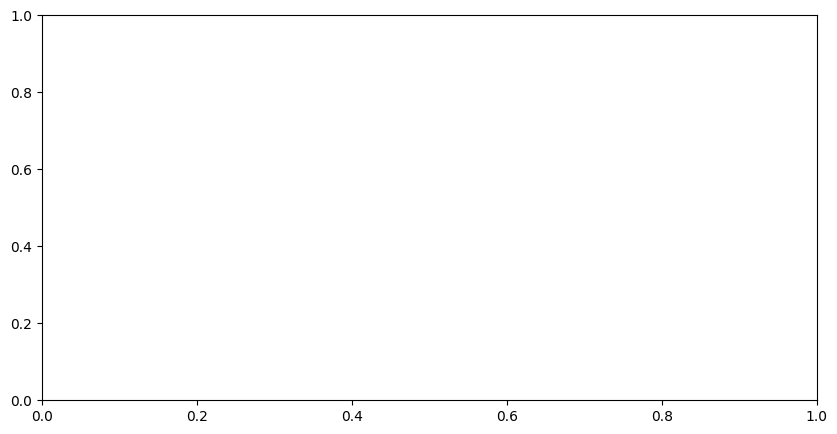

In [18]:
# Type your answer here
x  = ...       # epicentral distance vector
h  = ...
d  = ...
vp = ...
vs = ...

tp = ...
ts = ...

plt.figure(figsize = (10, 5), dpi = 100)
plt.plot(x, tp, ...)
plt.plot(x, ts, ...)
...

<!-- END QUESTION -->

---

# **2) Seismic Wave Ray Tracing**


P and S waves travel all over the world by traveling through the Earth. Because of changes
in seismic velocity and boundaries between different layers, the ray paths can be
complicated. In addition, when looking at ray paths on larger scales, we have to take into
account the fact that the Earth is round(ish). 

![alt text](./prem.png)
**Figure 2:** From Shearer, "Introduction to seismology" (2009), PREM velocity and density model.

We will use Ray Tracing from the open-source software Python Obspy (https://docs.obspy.org/). Obspy provides plenty of useful built-in functions that have been validated by the community.

In [19]:
import obspy

First, we reproduce the results from the previous exercise

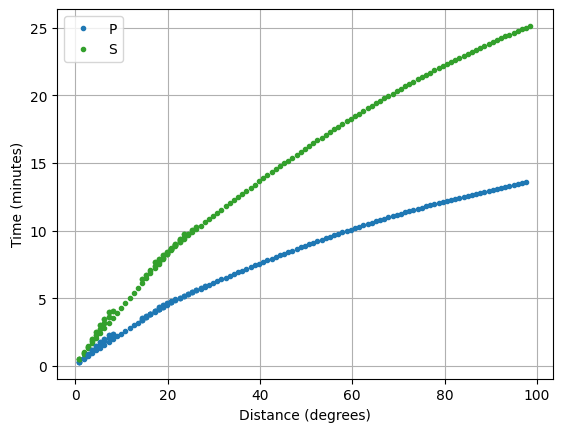

In [20]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=10, ax=ax, fig=fig, model='iasp91',
                       phase_list=['P','S'], npoints=200)

Angular distances in degrees are the angle (in degrees) from the source, to the receiver, with the point of reference located in the center of the Earth. 90$^\circ$ angular distance is a quarter of the Earth circumference away from the source.

You will now see the ray paths for the P, S, PKP (P wave in the
outer core), and ScS (S wave reflected off the core-mantle boundary) phases (Figure 2) as well as a travel time curve for all four phases.

Text(3.141592653589793, 4926.5, 'Solid mantle')

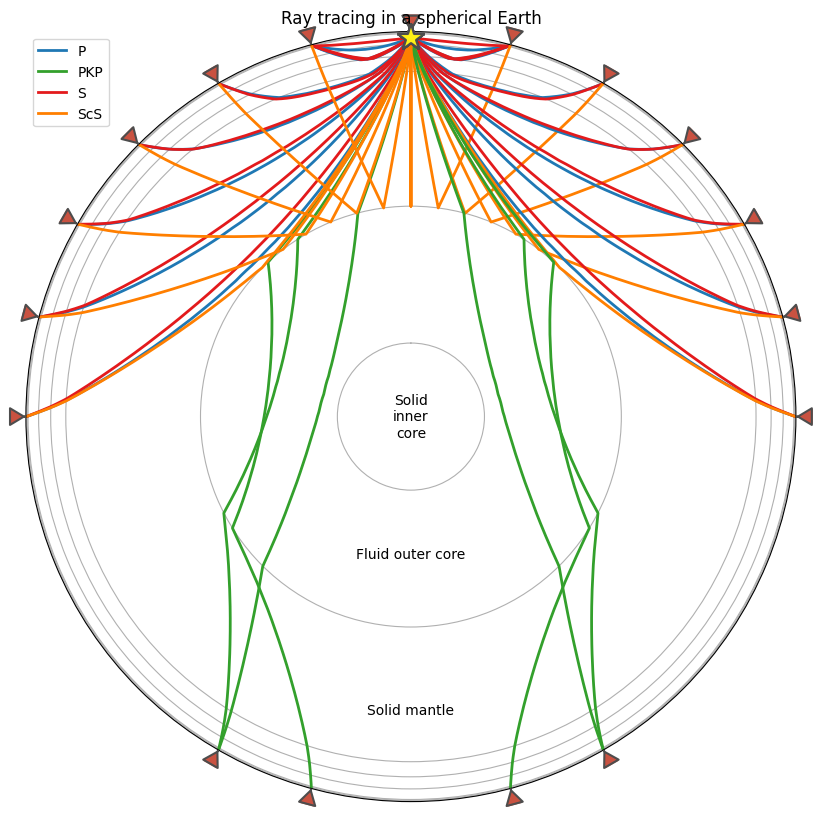

In [21]:
from obspy.taup.tau import plot_ray_paths
from obspy.taup import TauPyModel


model = TauPyModel(model='iasp91')
fig, ax = plt.subplots(subplot_kw=dict(polar=True)) # this declares the figure variables
fig.set_size_inches(18,10) # this sets the size of the figure
ax = plot_ray_paths(source_depth=100, ax=ax, fig=fig, phase_list=['P','S', 'PKP','ScS'], 
                    npoints=25,show=False,legend=True) # this is a built-in function to plot the rays
ax.set_title('Ray tracing in a spherical Earth') # this will add a title
# these lines will add text on the plot
ax.text(0, 0, 'Solid\ninner\ncore',
        horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))



<!-- BEGIN QUESTION -->

**Question 3a:** Why aren't there any S waves in the outer core? (1 point)

This is my answer

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3b** Notice that within the mantle (the first thick layer), the ray paths of both the P and S waves are curved. What causes this curvature? Think about what happens to the seismic velocity with increasing depth and the cause of this phenomenon. Remember seismic velocity depends on more than just density. (2 points)

This is my answer

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3c.** What direction do the P-waves bend as they enter the outer core? What does this say about the P-wave velocity in the outer core vs. the mantle? (2 points)

This is my answer

<!-- END QUESTION -->

**Triplications in the crust**

Below we will see why once we can detect several P waves. We calculate the ray paths and travel time at really short distances, for an earthquake a source depth of 5km and a distance of about 111 km (1$^\circ$ of angular distances).

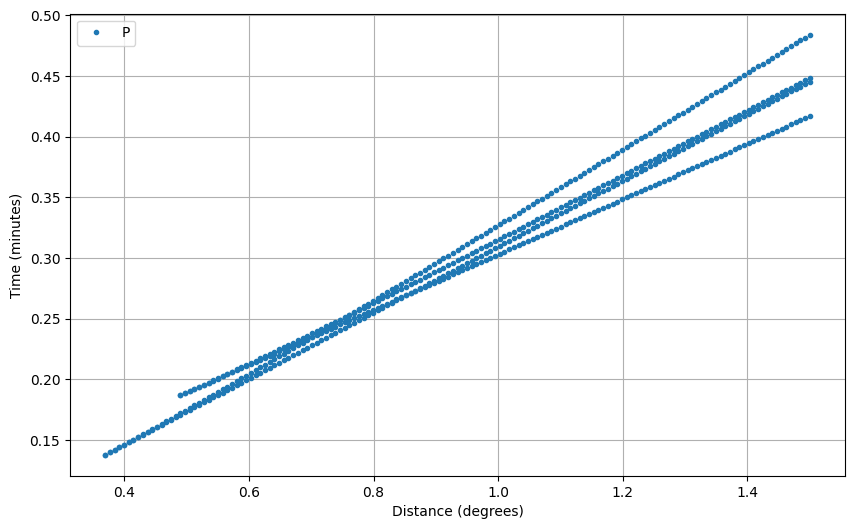

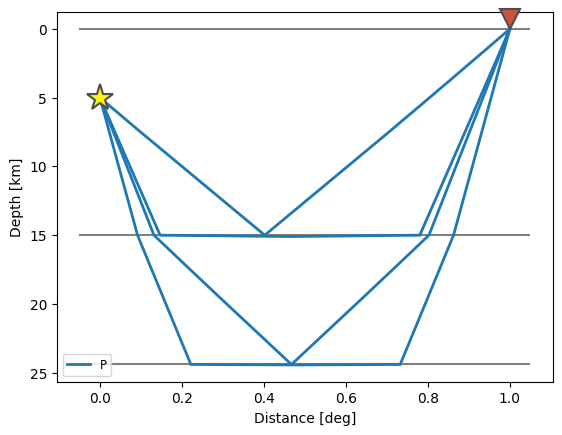

<Axes: xlabel='Distance [deg]', ylabel='Depth [km]'>

In [22]:
model = TauPyModel(model='prem')

# plot the travel-time curves
fig,ax  = plt.subplots()
fig.set_size_inches(10,6)
ax = plot_travel_times(source_depth=5, ax=ax, fig=fig, model='prem',
                       phase_list=['P'], npoints=200, max_degrees=1.5, min_degrees=0)
ax.grid(True)
ax.set_title('Travel-time curves')
print('')


# plot the ray paths in cartesian coordinates.
arrivals = model.get_ray_paths(5, 1, phase_list=['P'])
arrivals.plot_rays(plot_type='cartesian', phase_list=['P'],
                   plot_all=False, legend=True)

<!-- BEGIN QUESTION -->

**Question 4** What are the 3 different P wave phases that cause the triplication? (2 points)

You don’t need to know the specific notation (e.g. PKP), but you should be able to explain what they are based on what you have been learning in class as well as what material they are traveling through. Look at the depth of the plot, and be specific.

This is my answer

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are the lab 2 of ESS 314 Autumn 2023.

In [23]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q2a results: All test cases passed!
